In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt
import math
import plotly.plotly as py
import plotly.tools as tls
import cufflinks as cf
print(cf.__version__)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from summarize import df_summary
from prepare_zillow import prepare_zillow_without_outliers
from prepare_zillow import create_outlier_df
from prepare_zillow import drop_standardized_outliers
from prepare_zillow import standardize_data
from prepare_zillow import handle_outliers

0.15


Makes Jupyter output long rather than in scrolly box!

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df = prepare_zillow_without_outliers()
df.sample(10)

Reading Zillow data...
Preparing and cleaning Zillow data...
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[33039.95776043]
[[-0.00962733]]
Univariate - final_exam = b + m * exam1
    y-intercept (b): 33039.96
    coefficient (m): -0.01

Zillow data is now ready for analysis!


,logerror,bath,bed,bedbath,totsqft,finsqft,year,land_tax_val,struct_tax_val,land_struct_tax_val,...,lotsize,bldgqualtype,hvac,landusecode,landusedesc,propzone,rawcensus,census,assessmentyr,transdate
parcelid,,,,,,,,,,,,,,,,,,,,,
10801424,-0.004000,0.000000,0.1,0.100000,0.023112,0.023112,0.514493,0.055232,0.009489,0.064721,...,0.002698,7.0,Floor/Wall,0100,Single Family Residential,LAR1,60371392,60371392001006,2015,2016-08-03
12729568,0.052558,0.222222,0.1,0.322222,0.059843,0.059843,0.768116,0.026438,0.018325,0.044762,...,0.014955,8.0,Central,010C,Condominium,LCR3*,60375031,60375031052013,2016,2017-02-24
10862725,-0.040196,0.222222,0.1,0.322222,0.051094,0.051094,0.797101,0.146825,0.015432,0.162257,...,0.008970,8.0,Central,010C,Condominium,LARD1.5,60371413,60371413041001,2016,2017-07-26
11927480,0.045570,0.000000,0.1,0.100000,0.044325,0.044325,0.413043,0.258752,0.133001,0.391753,...,0.004523,6.0,Floor/Wall,0100,Single Family Residential,TCR105,60374319,60374319003010,2016,2017-06-30
11183730,0.027044,0.222222,0.3,0.522222,0.159554,0.159554,0.811594,0.031163,0.029089,0.060252,...,0.003191,7.0,Central,0100,Single Family Residential,PDR16000*,60379102,60379102091024,2016,2017-03-10
12959016,-0.076811,0.000000,0.1,0.100000,0.053652,0.053652,0.492754,0.074723,0.011375,0.086098,...,0.003707,4.0,Floor/Wall,0100,Single Family Residential,MORM*,60374309,60374309012001,2016,2017-05-12
11120565,0.010000,0.111111,0.1,0.211111,0.040363,0.040363,0.891304,0.025692,0.026436,0.052128,...,0.027233,4.0,Central,010C,Condominium,SCSP,60379201,60379201141029,2015,2016-07-21
12050461,-0.021200,0.111111,0.2,0.311111,0.073875,0.073875,0.347826,0.158012,0.023446,0.181459,...,0.002310,7.0,Floor/Wall,0100,Single Family Residential,GLR1YY,60373014,60373014003001,2015,2016-09-13
12624128,0.012194,0.111111,0.2,0.311111,0.088073,0.088073,0.521739,0.079969,0.021653,0.101623,...,0.002717,6.0,Floor/Wall,0104,Single Family Residential,LAR1,60372933,60372933062001,2016,2017-04-18


In [4]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts().max())
    print(df[c].value_counts().min())

# df.describe()

---- logerror ---
503
1
---- bath ---
43179
5
---- bed ---
40388
1
---- bedbath ---
22377
1
---- totsqft ---
242
1
---- finsqft ---
242
1
---- year ---
3174
1
---- land_tax_val ---
106
1
---- struct_tax_val ---
124
1
---- land_struct_tax_val ---
14
1
---- tax_val ---
60
1
---- tax ---
6
1
---- zip ---
1687
1
---- regionidcity ---
33340
1
---- regionidcounty ---
95575
95575
---- fips ---
95575
95575
---- latitude ---
106
1
---- longitude ---
141
1
---- lotsize ---
316
1
---- bldgqualtype ---
31593
3
---- hvac ---
66181
71
---- landusecode ---
55608
1
---- landusedesc ---
69769
3
---- propzone ---
13737
1
---- rawcensus ---
1900
1
---- census ---
109
1
---- assessmentyr ---
51125
44450
---- transdate ---
696
1


In [5]:
num_df = df.select_dtypes('number')
num_df.sample(5)

,logerror,bath,bed,bedbath,totsqft,finsqft,year,land_tax_val,struct_tax_val,land_struct_tax_val,tax_val,tax,latitude,longitude,lotsize,rawcensus,census,assessmentyr
parcelid,,,,,,,,,,,,,,,,,,
11020613,-0.029883,0.111111,0.3,0.411111,0.053075,0.053075,0.514493,0.047349,0.010501,0.057849,0.022986,0.013421,34257887.0,-118439229.0,0.002579,60371192,60371192023008,2016
12417143,0.003000,0.222222,0.3,0.522222,0.147586,0.147586,0.652174,0.008328,0.012207,0.020535,0.012753,0.008154,33866907.0,-118106533.0,0.002685,60375545,60375545211036,2015
13052826,0.004000,0.222222,0.3,0.522222,0.160297,0.160297,0.717391,0.212749,0.027202,0.239952,0.087167,0.054055,34128261.0,-117713769.0,0.008523,60374002,60374002062000,2015
10718998,-0.050200,0.222222,0.3,0.522222,0.182666,0.182666,0.782609,0.098398,0.042569,0.140967,0.066193,0.039171,34215327.0,-118649840.0,0.003720,60371344,60371344241002,2015
12221646,0.021542,0.000000,0.1,0.100000,0.047792,0.047792,0.362319,0.008447,0.002257,0.010704,0.004139,0.002972,33943465.0,-118274096.0,0.002658,60372405,60372405003004,2016


In [6]:
df.dtypes  # 30 columns

logerror                float64
bath                    float64
bed                     float64
bedbath                 float64
totsqft                 float64
finsqft                 float64
year                    float64
land_tax_val            float64
struct_tax_val          float64
land_struct_tax_val     float64
tax_val                 float64
tax                     float64
zip                    category
regionidcity           category
regionidcounty         category
fips                   category
latitude                float64
longitude               float64
lotsize                 float64
bldgqualtype           category
hvac                     object
landusecode              object
landusedesc              object
propzone                 object
rawcensus                 int64
census                    int64
assessmentyr              int64
transdate                object
dtype: object

In [7]:
# Create the default pairplot
# sns.pairplot(df, hue='logerror') # ONLY RAN ONCE! And this was on a previous set of data before I messed with my
# standardizing functions and messed up roomcnt...

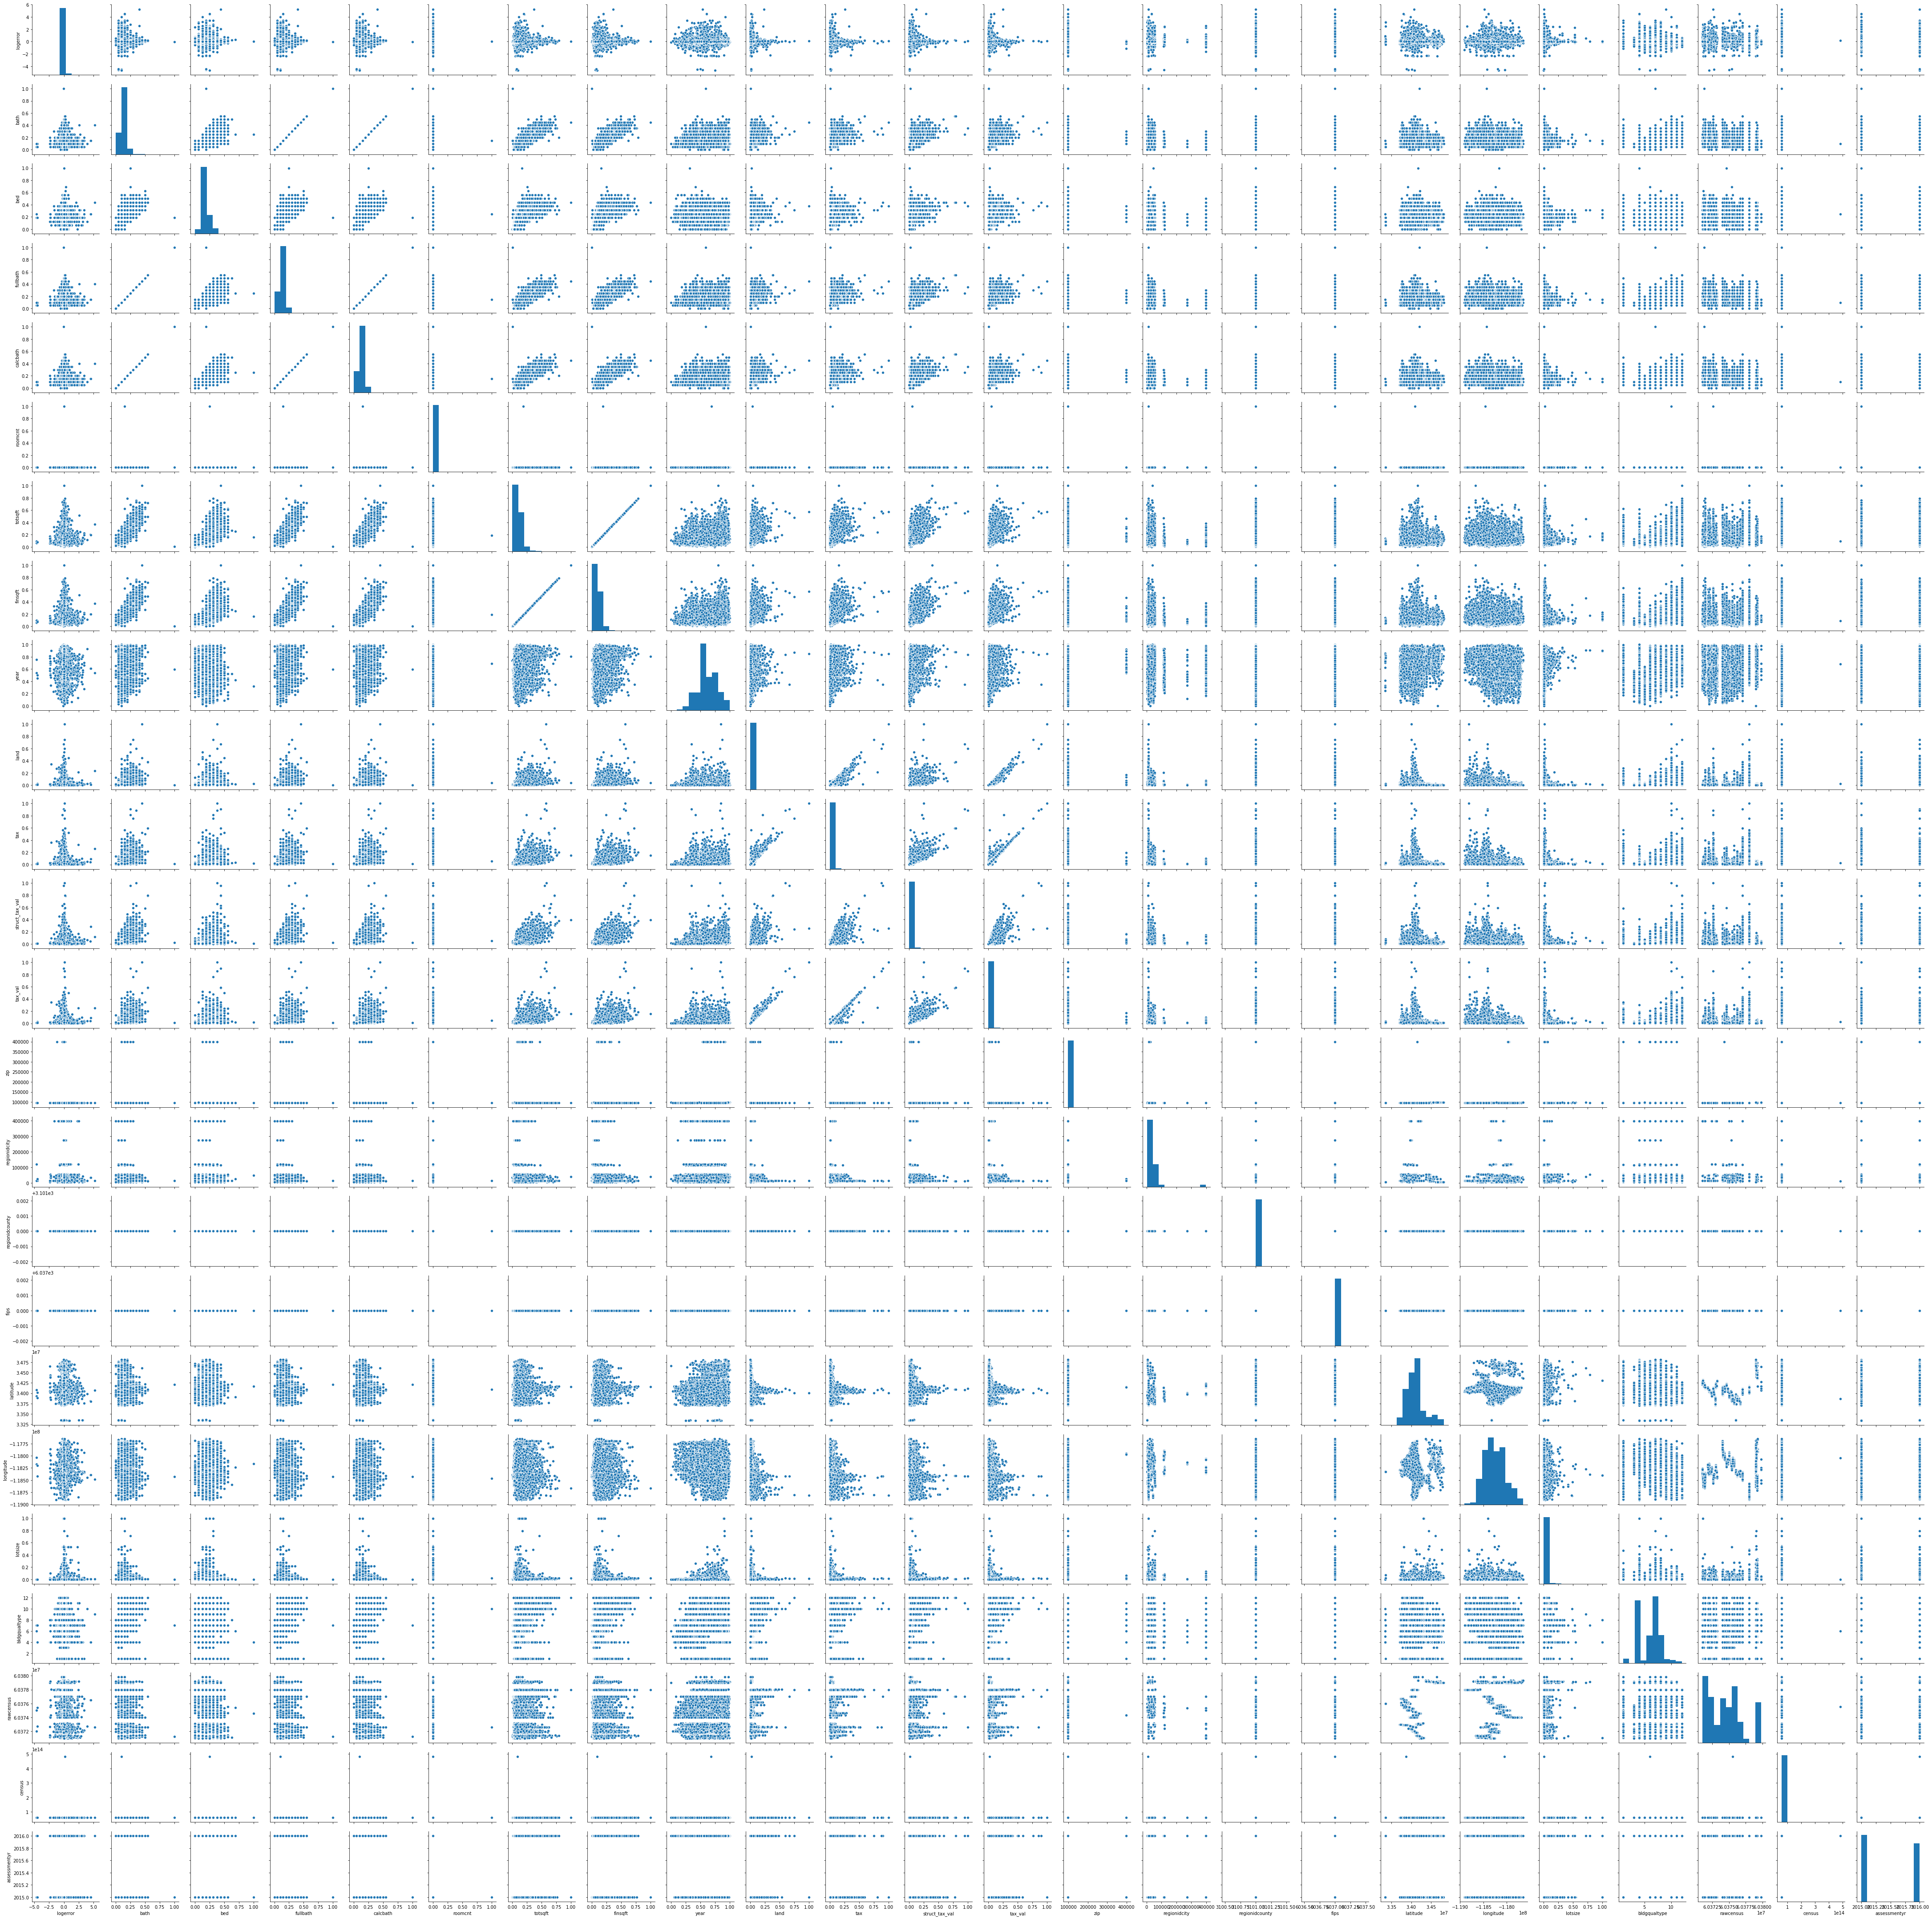

In [8]:
# cannot get this to finish running
# sns_plot = sns.pairplot(df, hue='logerror', height=2.5)
# sns_plot.savefig("pairplot.png")

In [9]:
df.columns.tolist()

['logerror',
 'bath',
 'bed',
 'bedbath',
 'totsqft',
 'finsqft',
 'year',
 'land_tax_val',
 'struct_tax_val',
 'land_struct_tax_val',
 'tax_val',
 'tax',
 'zip',
 'regionidcity',
 'regionidcounty',
 'fips',
 'latitude',
 'longitude',
 'lotsize',
 'bldgqualtype',
 'hvac',
 'landusecode',
 'landusedesc',
 'propzone',
 'rawcensus',
 'census',
 'assessmentyr',
 'transdate']

In [10]:
df_summary(df)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
--- Top and Bottom:
Sorted by logerror:
Head:
parcelid  11815849  12728547  11557016
logerror  -4.65542    -4.605     -4.51
 
Tail: 
parcelid  12668872  12668867  11617445
logerror     4.445      4.52     4.737
-----
Sorted by bath:
Head:
parcelid  12434891  12289936  12988674
bath           0.0       0.0       0.0
 
Tail: 
parcelid  11688857  13080289  10933420
bath           1.0       1.0       1.0
-----
Sorted by bed:
Head:
parcelid  11643551  11239094  12333087
bed            0.0       0.0       0.0
 
Tail: 
parcelid  10924177  11095530  12267812
bed            0.8       0.9       1.0
-----
Sorted by bedbath:
Head:
parcelid  12782699  12546184  12035238
bedbath        0.0       0.0       0.0
 
Tail: 
parcelid  10868058  10933420  11095530
bedbath   1.588889       1.8       1.9
-----
Sorted by totsqft:
Head:
parcelid  10736578  10736667  10736547
totsqft        0.0       0.0       0.0
 
Tail: 
parcelid  10847031  10755872  10851519
t

                     num_missing  missing_percentage  num_empty  \
logerror                       0                 0.0          0   
bath                           0                 0.0          0   
bed                            0                 0.0          0   
bedbath                        0                 0.0          0   
totsqft                        0                 0.0          0   
finsqft                        0                 0.0          0   
year                           0                 0.0          0   
land_tax_val                   0                 0.0          0   
struct_tax_val                 0                 0.0          0   
land_struct_tax_val            0                 0.0          0   
tax_val                        0                 0.0          0   
tax                            0                 0.0          0   
zip                            0                 0.0          0   
regionidcity                   0                 0.0          

In [11]:
columns = df.select_dtypes('object').columns
columns = columns.append(df.select_dtypes('category').columns)
for col in columns:
    print(col, ':')
    print(df[col].value_counts(dropna=False))
    print('%%%%%%%%%%%%%%%%')

hvac :
Central       66181
Floor/Wall    27976
None           1347
Solar            71
Name: hvac, dtype: int64
%%%%%%%%%%%%%%%%
landusecode :
0100    55608
010C    17122
0101    12964
010E     3732
010D     3688
0104      686
012C      411
01DC      349
01HC      203
0103      154
010G      128
010H      121
0700       93
010M       92
0108       91
010F       54
010V       23
0109       21
0110        7
070D        7
0102        6
0113        3
0130        2
0131        2
0105        2
012E        2
0111        1
012D        1
0114        1
010         1
Name: landusecode, dtype: int64
%%%%%%%%%%%%%%%%
landusedesc :
Single Family Residential    69769
Condominium                  21938
Planned Unit Development      3688
Mobile Home                    100
Cooperative                     54
Residential General             23
Townhouse                        3
Name: landusedesc, dtype: int64
%%%%%%%%%%%%%%%%
propzone :
LAR1          13737
LAR3           4318
LARS           2881
LBR1N    

In [12]:
sm_df = df[['totsqft', 'land_tax_val', 'longitude', 'struct_tax_val', 'year', 
            'latitude', 'lotsize', 'transdate', 'tax', 'bath', 'bed']].head(40000)
log_df = df[['logerror']].head(40000)

In [13]:
fig = {
    'data': [
        {'x': sm_df.totsqft, 'y': sm_df.land_tax_val, 'text': log_df.logerror, 'mode': 'markers', 'name': 'logerror for land_tax_val'},
        {'x': sm_df.totsqft, 'y': sm_df.struct_tax_val, 'text': log_df.logerror, 'mode': 'markers', 'name': 'logerror for struct_tax_val'}
    ],
    'layout': {
        'xaxis': {'title': 'total square feet'},
        'yaxis': {'title': 'tax value'}
    }
}
py.iplot(fig)

# could make one or both of them a log graph...         'xaxis': {'title': 'totsqft', 'type': 'log'},


The draw time for this plot will be slow for all clients.


In [14]:
fig = {
    'data': [
        {'x': sm_df.totsqft, 'y': log_df.logerror, 'text': log_df.logerror, 'mode': 'markers', 'name': 'totsqft_logerror'},
        {'x': sm_df.land_tax_val, 'y': log_df.logerror, 'text': log_df.logerror, 'mode': 'markers', 'name': 'landtaxval_logerror'}
    ],
    'layout': {
        'xaxis': {'title': 'total square feet/land_tax_val'},
        'yaxis': {'title': 'logerror'}
    }
}
py.iplot(fig)

# could make one or both of them a log graph...         'xaxis': {'title': 'totsqft', 'type': 'log'},


The draw time for this plot will be slow for all clients.


In [15]:
# COULD NOT GET TO SHOW MEANING
# py.iplot(
#     {
#         'data': [
#             {
#                 'x': sm_df[sm_df['bed']==bed]['bed'],
#                 'y': sm_df[sm_df['bed']==bed]['struct_tax_val'],
#                 'name': bed, 'mode': 'markers',
#             } for bed in [1, 2, 3]
#         ],
#         'layout': {
#             'xaxis': {'title': 'bed', 'type': 'log'},
#             'yaxis': {'title': "struct_tax_val"}
#         }
# })

In [16]:
sm_df.columns

Index(['totsqft', 'land_tax_val', 'longitude', 'struct_tax_val', 'year',
       'latitude', 'lotsize', 'transdate', 'tax', 'bath', 'bed'],
      dtype='object')

In [17]:
plot_df = sm_df[['totsqft', 'land_tax_val', 'struct_tax_val', 'year',
                 'lotsize', 'tax', 'bath', 'bed']]

In [18]:
plot_df.iplot(kind='box')

In [19]:
# Did not seem to show anything...

# data = [go.Heatmap(z=sm_df.values.tolist(), colorscale='Viridis')]

# py.iplot(data, filename='pandas-heatmap')

In [20]:
sm_df.select_dtypes('number').columns

Index(['totsqft', 'land_tax_val', 'longitude', 'struct_tax_val', 'year',
       'latitude', 'lotsize', 'tax', 'bath', 'bed'],
      dtype='object')

In [21]:
sm_df.columns

Index(['totsqft', 'land_tax_val', 'longitude', 'struct_tax_val', 'year',
       'latitude', 'lotsize', 'transdate', 'tax', 'bath', 'bed'],
      dtype='object')

In [22]:
sm_df.drop(columns='transdate', axis=1).head(2)

,totsqft,land_tax_val,longitude,struct_tax_val,year,latitude,lotsize,tax,bath,bed
parcelid,,,,,,,,,,
11016594,0.097648,0.094908,-118488536.0,0.016945,0.586957,34280990.0,0.003648,0.038216,0.111111,0.2
12098116,0.141643,0.023102,-118175032.0,0.008551,0.449275,34136312.0,0.005652,0.065649,0.222222,0.1


In [23]:
# import plotly.figure_factory as ff
# # HEATMAP
# # cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# # cf.datagen.heatmap(20,20).iplot(kind='heatmap',colorscale='spectral')


# # z = [[.1, .3, .5],  
# #      [1.0, .8, .6],
# #      [.6, .4, .2]]
# z = sm_df.drop(columns='transdate', axis=1)

# # x = ['Team A', 'Team B', 'Team C']
# x = sm_df.select_dtypes('number').columns

# # y = ['Game Three', 'Game Two', 'Game One']
# y = sm_df.select_dtypes('number').columns

# # z_text = [['Win', 'Lose', 'Win'],  
# #           ['Lose', 'Lose', 'Win'],
# #           ['Win', 'Win', 'Lose']]
# z_text = sm_df.drop(columns='transdate', axis=1)


# fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
# # fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# py.iplot(fig, filename='annotated_heatmap_text')

In [24]:
log_series = df['logerror'].head(40000)

log_series.iplot(kind='bar', yTitle='logerror', title='logerror per feature')

The draw time for this plot will be slow for clients without much RAM.


In [25]:
sm_df.columns

Index(['totsqft', 'land_tax_val', 'longitude', 'struct_tax_val', 'year',
       'latitude', 'lotsize', 'transdate', 'tax', 'bath', 'bed'],
      dtype='object')

In [26]:
plot_df = sm_df.drop(columns=['longitude','latitude'])
plot_df.columns

Index(['totsqft', 'land_tax_val', 'struct_tax_val', 'year', 'lotsize',
       'transdate', 'tax', 'bath', 'bed'],
      dtype='object')

In [27]:
plot_df.iplot(kind='barh',barmode='stack', bargap=.1)

The draw time for this plot will be slow for all clients.


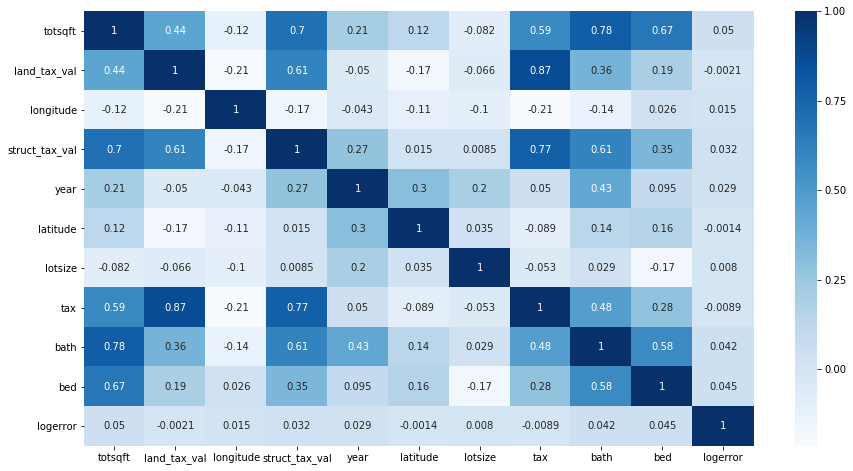

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.concat([sm_df, log_df], axis=1).corr(), cmap="Blues", annot=True)
plt.show()

In [29]:
def df_print_r_and_p_values(X, y):
    r_and_p_values = {col: stats.pearsonr(X[col], y) for col in X.columns}
    print("PEARSON'S R")
    for k, v in r_and_p_values.items():
        col = k
        r, p = v
        print(f"{col}:")
        print(f"\tPearson's R is {r:.2f} ")
        print(f"\twith a significance p-value of {p: .3}\n")

In [30]:
num_vars = df.select_dtypes('number').columns
num_df = df[num_vars]
num_df = num_df[num_vars]
num_logerror_series = num_df['logerror']
num_vars

Index(['logerror', 'bath', 'bed', 'bedbath', 'totsqft', 'finsqft', 'year',
       'land_tax_val', 'struct_tax_val', 'land_struct_tax_val', 'tax_val',
       'tax', 'latitude', 'longitude', 'lotsize', 'rawcensus', 'census',
       'assessmentyr'],
      dtype='object')

In [31]:
df_print_r_and_p_values(num_df, num_logerror_series)

PEARSON'S R
logerror:
	Pearson's R is 1.00 
	with a significance p-value of  0.0

bath:
	Pearson's R is 0.03 
	with a significance p-value of  1.23e-24

bed:
	Pearson's R is 0.04 
	with a significance p-value of  8.09e-29

bedbath:
	Pearson's R is 0.04 
	with a significance p-value of  2.08e-33

totsqft:
	Pearson's R is 0.04 
	with a significance p-value of  7.61e-37

finsqft:
	Pearson's R is 0.04 
	with a significance p-value of  7.61e-37

year:
	Pearson's R is 0.02 
	with a significance p-value of  3.71e-12

land_tax_val:
	Pearson's R is -0.01 
	with a significance p-value of  2.56e-05

struct_tax_val:
	Pearson's R is 0.01 
	with a significance p-value of  9.44e-05

land_struct_tax_val:
	Pearson's R is -0.01 
	with a significance p-value of  0.00283

tax_val:
	Pearson's R is -0.00 
	with a significance p-value of  0.198

tax:
	Pearson's R is -0.02 
	with a significance p-value of  7.27e-07

latitude:
	Pearson's R is -0.00 
	with a significance p-value of  0.964

longitude:
	Pearson's

In [32]:
x_vars = ['totsqft', 'land_tax_val', 'longitude', 'struct_tax_val', 'year', 
          'latitude', 'lotsize', 'tax', 'bath', 'bed']
df_print_r_and_p_values(sm_df[x_vars], log_series)

PEARSON'S R
totsqft:
	Pearson's R is 0.05 
	with a significance p-value of  9.03e-24

land_tax_val:
	Pearson's R is -0.00 
	with a significance p-value of  0.675

longitude:
	Pearson's R is 0.02 
	with a significance p-value of  0.00233

struct_tax_val:
	Pearson's R is 0.03 
	with a significance p-value of  8.41e-11

year:
	Pearson's R is 0.03 
	with a significance p-value of  5.37e-09

latitude:
	Pearson's R is -0.00 
	with a significance p-value of  0.781

lotsize:
	Pearson's R is 0.01 
	with a significance p-value of  0.108

tax:
	Pearson's R is -0.01 
	with a significance p-value of  0.0746

bath:
	Pearson's R is 0.04 
	with a significance p-value of  2.45e-17

bed:
	Pearson's R is 0.05 
	with a significance p-value of  2.14e-19

